# **UTS Kapita Selekta Informatika**

**Identitas Mahasiswa**

*   **Nama : Aulia Rahman Zulfi**
*   **NIM : 119140110**
*   **Kapita Selekta Informatika - RD**

In [1]:
import tweepy
import pandas as pd
from collections import Counter
import nltk 
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
consumer_key = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXH"
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
bearer_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_term = "formula e jakarta -filter:retweets"
since_date = "2021-10-01"

In [7]:
tweets = tweepy.Cursor(api.search, q=search_term,lang='id').items(1000) 
all_tweets = [[tweet.text, tweet.created_at, tweet.user.location] for tweet in tweets]

print("Data yang diambil : ", len(all_tweets))

Data yang diambil :  589


In [8]:
all_tweets[:1000]

[['Gelaran Formula E di Jakarta akan dibarengi dengan konser hingga festival. Panitia mengaku terinspirasi gelaran For… https://t.co/h3x9lFZdpq',
  datetime.datetime(2022, 3, 28, 23, 50, 40),
  'Jakarta, Indonesia'],
 ['PT Jakarta Propertindo menurunkan kapasitas jumlah penonton yang bisa menonton langsung balapan mobil listrik itu.… https://t.co/WxrnvArJys',
  datetime.datetime(2022, 3, 28, 23, 45),
  'Palmerah, Jakarta'],
 ['@HermanBudiSant4 @Boediantar4 @marlina_idha @Mdy_Asmara1701 @tatakujiyati @penikmatko_pi @SahabatDrZARRIL… https://t.co/os9Nkv3Ll2',
  datetime.datetime(2022, 3, 28, 23, 26, 45),
  ''],
 ['Tiket perhelatan Formula E belum dijual saat balapan digelar kurang dari 67 hari. Ini penjelasan panitia Formula E… https://t.co/8FYlVwPIGz',
  datetime.datetime(2022, 3, 28, 23, 25, 41),
  'Jakarta, Indonesia'],
 ['..https://t.co/51mM2f7GsR\n\nPSI menyoroti pemangkasan kapasitas kursi penonton ajang Formula E Jakarta yang terlampa… https://t.co/XPBYHNBO1f',
  datetime.datetime

In [9]:
df = pd.DataFrame(all_tweets,columns=['text','date', 'user_location'])
df.to_csv('Formula-E-Tweets.csv', index=False)
df

,text,date,user_location
0,Gelaran Formula E di Jakarta akan dibarengi de...,2022-03-28 23:50:40,"Jakarta, Indonesia"
1,PT Jakarta Propertindo menurunkan kapasitas ju...,2022-03-28 23:45:00,"Palmerah, Jakarta"
2,@HermanBudiSant4 @Boediantar4 @marlina_idha @M...,2022-03-28 23:26:45,
3,Tiket perhelatan Formula E belum dijual saat b...,2022-03-28 23:25:41,"Jakarta, Indonesia"
4,..https://t.co/51mM2f7GsR\n\nPSI menyoroti pem...,2022-03-28 23:02:02,
...,...,...,...
584,Debat-debat tolol itu pasti akan tetap berlanj...,2022-03-20 17:27:36,Indonesia
585,@ernestprakasa Doakn dan smangati juga bg. \nS...,2022-03-20 17:26:29,pulau kodomo
586,@jokowi Smoga tahun2 brikutnya bisa lebih baik...,2022-03-20 17:08:35,pulau kodomo
587,@Rexa95320619 @niniqwahyuni @Aprillia_MAN @Dok...,2022-03-20 16:13:06,"Brisbane, Queensland"


In [10]:
def transform(text):
  stopWords = set(stopwords.words('indonesian'))
  text = str(text)
  text = re.sub(r'@[A-Za-z0-9]+',' ', text)
  text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)

  words = text.lower().split()

  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  stripped = [re_punc.sub('', w) for w in words]
  no_garbage = [w for w in stripped if not w in stopWords]

  return(" ".join(no_garbage))

In [11]:
df['tweets_transform'] = df['text'].apply(transform)

In [12]:
df['tweets_transform'].to_csv('Formula-E-CleanTweets.csv', index=False)
df['tweets_transform']

0      gelaran formula e jakarta dibarengi konser fes...
1      pt jakarta propertindo menurunkan kapasitas pe...
2                                     idha asmara1701 pi
3      tiket perhelatan formula e dijual balapan dige...
4      psi menyoroti pemangkasan kapasitas kursi peno...
                             ...                        
584    debatdebat tolol berlanjut sampe formula e jak...
585    doakn smangati bg smoga trsmogakanformula e ja...
586    smoga tahun2 brikutnya indonesia bisasmakin by...
587    man yg usik buadaya org mslh pawang hujan kepe...
588    pemerintah mendorong formula e fe motogp samas...
Name: tweets_transform, Length: 589, dtype: object

In [13]:
df

,text,date,user_location,tweets_transform
0,Gelaran Formula E di Jakarta akan dibarengi de...,2022-03-28 23:50:40,"Jakarta, Indonesia",gelaran formula e jakarta dibarengi konser fes...
1,PT Jakarta Propertindo menurunkan kapasitas ju...,2022-03-28 23:45:00,"Palmerah, Jakarta",pt jakarta propertindo menurunkan kapasitas pe...
2,@HermanBudiSant4 @Boediantar4 @marlina_idha @M...,2022-03-28 23:26:45,,idha asmara1701 pi
3,Tiket perhelatan Formula E belum dijual saat b...,2022-03-28 23:25:41,"Jakarta, Indonesia",tiket perhelatan formula e dijual balapan dige...
4,..https://t.co/51mM2f7GsR\n\nPSI menyoroti pem...,2022-03-28 23:02:02,,psi menyoroti pemangkasan kapasitas kursi peno...
...,...,...,...,...
584,Debat-debat tolol itu pasti akan tetap berlanj...,2022-03-20 17:27:36,Indonesia,debatdebat tolol berlanjut sampe formula e jak...
585,@ernestprakasa Doakn dan smangati juga bg. \nS...,2022-03-20 17:26:29,pulau kodomo,doakn smangati bg smoga trsmogakanformula e ja...
586,@jokowi Smoga tahun2 brikutnya bisa lebih baik...,2022-03-20 17:08:35,pulau kodomo,smoga tahun2 brikutnya indonesia bisasmakin by...
587,@Rexa95320619 @niniqwahyuni @Aprillia_MAN @Dok...,2022-03-20 16:13:06,"Brisbane, Queensland",man yg usik buadaya org mslh pawang hujan kepe...


In [14]:
count_tweets_transform = Counter(" ".join(df["tweets_transform"]).lower().split()).most_common(15)
count_tweets_transform

[('formula', 419),
 ('e', 406),
 ('jakarta', 382),
 ('dki', 127),
 ('sirkuit', 109),
 ('dprd', 71),
 ('ketua', 60),
 ('kpk', 55),
 ('yg', 52),
 ('pawang', 50),
 ('pembangunan', 46),
 ('mandalika', 46),
 ('motogp', 41),
 ('korupsi', 38),
 ('hujan', 38)]

In [15]:
count_tweets_transform = pd.DataFrame(count_tweets_transform, columns=['words','count'])
count_tweets_transform.head()

,words,count
0,formula,419
1,e,406
2,jakarta,382
3,dki,127
4,sirkuit,109


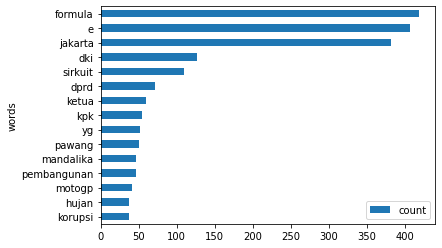

In [16]:
count_tweets_transform.sort_values(by='count').plot.barh(x='words', y='count')
plt.show()

In [17]:
count_user_location = Counter(" ".join(df["user_location"]).lower().split()).most_common(15)
count_user_location

[('indonesia', 180),
 ('jakarta', 124),
 ('jakarta,', 46),
 ('dki', 41),
 ('capital', 24),
 ('jawa', 17),
 ('region', 13),
 ('barat', 11),
 ('region,', 11),
 ('kota', 10),
 ('indone', 9),
 ('selatan,', 9),
 ('-', 7),
 ('utara', 7),
 ('üt:', 7)]

In [18]:
count_user_location = pd.DataFrame(count_user_location, columns=['lokasi','count'])
count_user_location.head()

,lokasi,count
0,indonesia,180
1,jakarta,124
2,"jakarta,",46
3,dki,41
4,capital,24


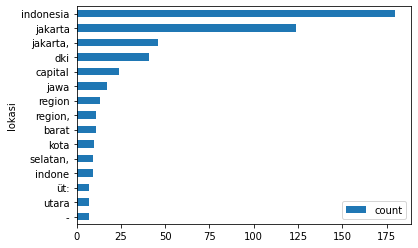

In [19]:
count_user_location.sort_values(by='count').plot.barh(x='lokasi', y='count')
plt.show()

In [20]:
count_date = df['date'].groupby(df.date.dt.to_period("d")).agg('count')
count_date

date
2022-03-20      9
2022-03-21    150
2022-03-22     81
2022-03-23     58
2022-03-24     40
2022-03-25     61
2022-03-26     51
2022-03-27     59
2022-03-28     80
Freq: D, Name: date, dtype: int64

# **Sentiment Analisis**

In [21]:
def set_Sentiment(text):
  text = str(text)
  if text != '':
    analysis = TextBlob(text)

    try:
      analysis = analysis.translate(from_lang ='id', to='en').sentiment
      sentiment = analysis.polarity
    except:
      sentiment = 0
    
    return sentiment

In [22]:
df['polarity'] = df['tweets_transform'].apply(set_Sentiment)

In [23]:
df['polarity'].head(10)

0    0.0
1    0.1
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: polarity, dtype: float64

In [24]:
if (df['polarity'].mean() > 0):
  print('Hasil Sentiment rata-rata POSITIF dengan nilai : ',df['polarity'].mean())
else:
  print('Hasil Sentiment rata-rata NEGATIF dengan nilai', df['polarity'].mean())

Hasil Sentiment rata-rata POSITIF dengan nilai :  0.0473252017257119


In [25]:
def hasilSentiment(row):
    if row['polarity'] > 0:
        val = 'positif'
    elif row['polarity'] == 0:
        val = 'netral'
    else:
        val = 'negatif'
    return val

In [26]:
df['result'] = df.apply(hasilSentiment, axis=1)
df.get(['tweets_transform','result', 'polarity'])

,tweets_transform,result,polarity
0,gelaran formula e jakarta dibarengi konser fes...,netral,0.0
1,pt jakarta propertindo menurunkan kapasitas pe...,positif,0.1
2,idha asmara1701 pi,netral,0.0
3,tiket perhelatan formula e dijual balapan dige...,netral,0.0
4,psi menyoroti pemangkasan kapasitas kursi peno...,netral,0.0
...,...,...,...
584,debatdebat tolol berlanjut sampe formula e jak...,negatif,-0.6
585,doakn smangati bg smoga trsmogakanformula e ja...,netral,0.0
586,smoga tahun2 brikutnya indonesia bisasmakin by...,netral,0.0
587,man yg usik buadaya org mslh pawang hujan kepe...,netral,0.0


In [27]:
df.get(['tweets_transform','result', 'polarity']).to_csv('Formula-E-Polarity.csv', index=False)

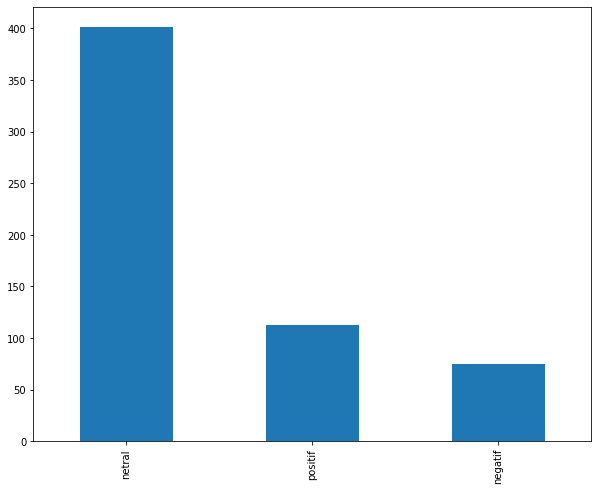

In [28]:
df["result"].value_counts().plot(kind="bar", figsize=(10,8))

In [29]:
frame = pd.read_csv("Formula-E-Polarity.csv")
frame

,tweets_transform,result,polarity
0,gelaran formula e jakarta dibarengi konser fes...,netral,0.0
1,pt jakarta propertindo menurunkan kapasitas pe...,positif,0.1
2,idha asmara1701 pi,netral,0.0
3,tiket perhelatan formula e dijual balapan dige...,netral,0.0
4,psi menyoroti pemangkasan kapasitas kursi peno...,netral,0.0
...,...,...,...
584,debatdebat tolol berlanjut sampe formula e jak...,negatif,-0.6
585,doakn smangati bg smoga trsmogakanformula e ja...,netral,0.0
586,smoga tahun2 brikutnya indonesia bisasmakin by...,netral,0.0
587,man yg usik buadaya org mslh pawang hujan kepe...,netral,0.0


In [30]:
df[["polarity"]].describe()

,polarity
count,588.000000
mean,0.047325
std,0.232362
min,-0.800000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [31]:
most_tweets = df.loc[df['polarity'] >= 0.75, ['tweets_transform']].sample(3).values
for most_tweet in most_tweets:
    print("Tweet : ")
    print(most_tweet[0]+"\n")

Tweet : 
motogp sukses saksikan formula e berdoa minimal jakarta menya

Tweet : 
jakarta sukses menyelenggarakan formula e yg bangga nih orang jakarta sj

Tweet : 
legislator dki jakarta pelaksanaan formula e sukses dibanding motogp estiarimiputri



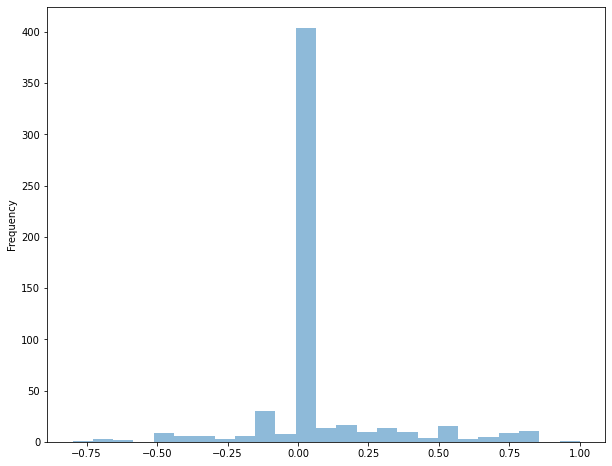

In [32]:
df['polarity'].plot.hist(bins=25, alpha=0.5, figsize=(10, 8))

In [33]:
frame.to_csv('Formula-E-Result.csv', index=False)

# **Wordcloud**

In [34]:
wordsnegatif = ' '.join([Text for Text in df[df['result']=='negatif']['tweets_transform']])
wordsnegatif

'crab mata buta atw jakarta internasional stadion sdh dadakan arti dibangun super kilat ngga respons baiksaya wakil ketua komisi e bidang kesra dprd dki jakarta anggara wicitra sastroamidjojo dibohongi lantaran target menganggap kpk berhatihati penyelidikan perkara dugaan korupsi formula e dki jakarta pakar h cakrawala susahnya si bikin judul tuh fia sirkuit formula e jakarta direvisi ngapain pake sgala garagara ri jakarta kota yg deket dg ri seolah2 gak apa2 udh rusak formula e kabar ri tujuan utama tujuannya potong pita klo jakarta bangun formula e ooo cebong tolol psti mkn stres nakula gw bicara tehnik konstruksi ya droenzgw bicara green racing mending elo baca a klo dirasa kacau ya bantu biar ga kacauini event international jakarta dunia formula e gak sadar sirkuit formula e ibukota jakarta serang jokowi bae komite pelaksana formula e jakarta iriawan akibat revisi federasi otomotif internasional fia t  formula e diadakan dimandalika aja kasihan jakarta konsentrasi aja atasi kemacet

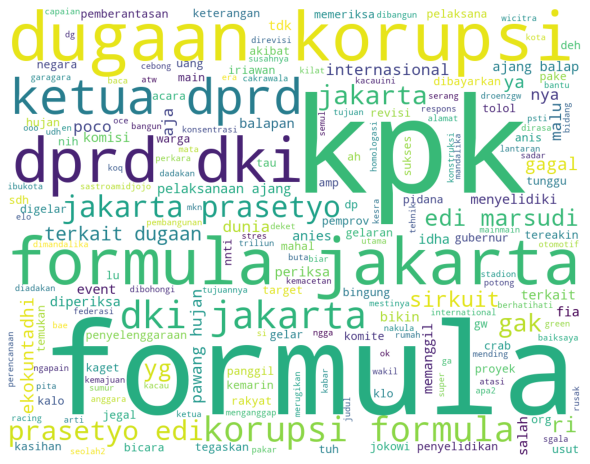

In [35]:
wordcloudnegatif = WordCloud(width=1024, height=800, background_color='white', min_font_size=14).generate(wordsnegatif)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloudnegatif)
plt.axis('off')
plt.savefig('Formula-E-WordcloudNegatif.jpg')
plt.tight_layout(pad=0)
plt.show()

In [36]:
wordspositif = ' '.join([Text for Text in df[df['result']=='positif']['tweets_transform']])
wordspositif

'pt jakarta propertindo menurunkan kapasitas penonton menonton langsung balapan mobil listrik anggota dprd dki jakarta gilbert simanjuntak menilai turunnya target penonton langsung formula e 500 tompelan nakula tepatnya orang2 y gerindra wajar kapasitas penonton formula e jakarta 50000 lestari heran dgn kebijakan membangun sirkuit utk formula ekenapa sentul tdk dimaksimalk grand stand 30 ribu orang memasukkan penonton semudah it acara bertaraf internasional menyuguhkan aksi pembalap sirkuit hibura tompelan nakula mudahnya kl bu anies baswedan memiliki kebiasaan memotong target program unggulannya target penonton langsung nabiel hidup lo jakarta klu cuman seputaran dp 0 formula e lo org ente banggakan lbh parah krn menghabiskan uang fee yg utk formula e yg ma pertamanya gelaran formula e jakarta menutup modal penyelenggaraan modal k asmara1701 oasti indonesia mendunia rakyat bangga indonesia kelas mandakika cakrawala semoga bermanfaat rakyat jakarta gimana formula e tuduhan si badrun pr

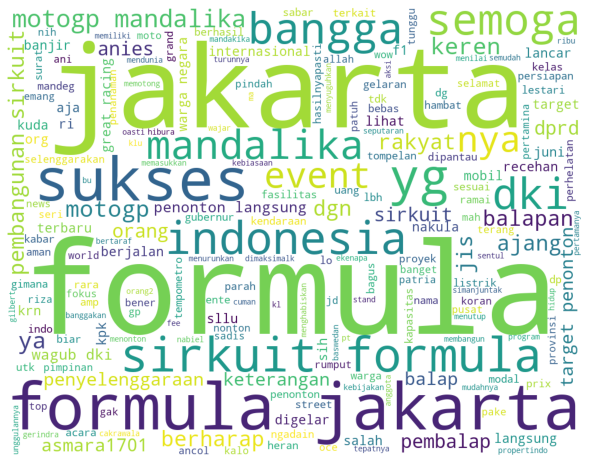

In [37]:
wordcloudpositif = WordCloud(width=1024, height=800, background_color='white', min_font_size=14).generate(wordspositif)

plt.figure(figsize=(8,8), facecolor = None)
plt.imshow(wordcloudpositif)
plt.axis('off')
plt.savefig('Formula-E-WordcloudPositif.jpg')
plt.tight_layout(pad=0)
plt.show()

# Data Frame List

In [38]:
df.to_csv('Formula-E.csv', index=False)
df

,text,date,user_location,tweets_transform,polarity,result
0,Gelaran Formula E di Jakarta akan dibarengi de...,2022-03-28 23:50:40,"Jakarta, Indonesia",gelaran formula e jakarta dibarengi konser fes...,0.0,netral
1,PT Jakarta Propertindo menurunkan kapasitas ju...,2022-03-28 23:45:00,"Palmerah, Jakarta",pt jakarta propertindo menurunkan kapasitas pe...,0.1,positif
2,@HermanBudiSant4 @Boediantar4 @marlina_idha @M...,2022-03-28 23:26:45,,idha asmara1701 pi,0.0,netral
3,Tiket perhelatan Formula E belum dijual saat b...,2022-03-28 23:25:41,"Jakarta, Indonesia",tiket perhelatan formula e dijual balapan dige...,0.0,netral
4,..https://t.co/51mM2f7GsR\n\nPSI menyoroti pem...,2022-03-28 23:02:02,,psi menyoroti pemangkasan kapasitas kursi peno...,0.0,netral
...,...,...,...,...,...,...
584,Debat-debat tolol itu pasti akan tetap berlanj...,2022-03-20 17:27:36,Indonesia,debatdebat tolol berlanjut sampe formula e jak...,-0.6,negatif
585,@ernestprakasa Doakn dan smangati juga bg. \nS...,2022-03-20 17:26:29,pulau kodomo,doakn smangati bg smoga trsmogakanformula e ja...,0.0,netral
586,@jokowi Smoga tahun2 brikutnya bisa lebih baik...,2022-03-20 17:08:35,pulau kodomo,smoga tahun2 brikutnya indonesia bisasmakin by...,0.0,netral
587,@Rexa95320619 @niniqwahyuni @Aprillia_MAN @Dok...,2022-03-20 16:13:06,"Brisbane, Queensland",man yg usik buadaya org mslh pawang hujan kepe...,0.0,netral
